### **Genre Classification and Music Information Retrieval Introduction**.

Music Information Retrieval (MIR) is an interdisciplinary ground that concentrates on computer-assisted analysis, structuring, and retrieval of music-related information. Automatic music genre classification, or the ability of machines to listen to sound and classify it based on musical style, has been one of the most researched problems of it. This has been one of the pillars in the MIR studies and has been used as a reference point in assessing how well algorithms are able to reproduce the perceptual and structural characteristics of music.

The example that is classical in this field is the GTZAN dataset, which is one of the first and most popular datasets that can be used in the study of genre classification. It is a collection of 30-second extracts of ten genres, including classical, jazz, rock, and pop, which have been used to test different machine learning and deep learning models. The overall music genre classification procedure consists of three basic steps, namely audio preprocessing, feature extraction, and model training.

## **The Libraries needed**

**Pandas**: is a library written for the Python programming language allowing data manipulation and analysis. In particular, it provides data structures and operations for manipulating numerical arrays and time series.

**Numpy** : is an extension of the Python programming language, designed to manipulate multidimensional matrices or arrays as well as mathematical functions operating on these arrays.

**Matplotlib** : Matplotlib is a library of the Python programming language for plotting and visualizing data in graphical form. It can be combined with the NumPy and SciPy python libraries for scientific computation.

**Scipy** : is a project aiming to unify and federate a set of Python libraries for scientific use. Scipy uses the arrays and matrices of the NumPy module.

**Pickle** : is a python module that allows you to save one or more variables in a file and retrieve their values later. Variables can be of any type.

**librosa** : It is a Python module to analyze audio signals in general but geared more towards music. It includes the nuts and bolts to build a MIR(Music information retrieval) system.

**IPython.display** : lets you play audio directly in your notebook.

**Librosa** : is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [28]:
audio_data = '/content/drive/MyDrive/GTZAN Dataset/Data/genres_original/jazz/jazz.00002.wav'
data , sr = librosa.load(audio_data)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [29]:
data , sr = librosa.load(audio_data)

This cell loads and decodes the audio as a time series y, represented as a one-dimensional NumPy floating point array. The variable sr contains the sampling rate of y, that is, the number of samples per second of audio.

By default, all audio is mixed to mono and resampled to 22050 Hz at load time. This behavior can be overridden by supplying additional arguments to librosa.load().

Audio will be automatically resampled to the given rate (*default sr=22050*).

To preserve the native sampling rate of the file, use sr=None.

We can change this behavior by resampling at **45.6KHz**.

In [30]:
librosa.load(audio_data, sr=45600)

(array([0.00323634, 0.00480567, 0.0049111 , ..., 0.04888666, 0.03638077,
        0.01668417], dtype=float32),
 45600)

This returns an audio time series as a numpy array with a default sampling rate(sr)

### **Playing The Audio**

With the use of IPython.display.Audio we will play the audio in our notebook.

In [31]:
import IPython
IPython.display.Audio(data, rate=sr)

### **Visualizing Audio**

Plot Raw Wave plot is the amplitude envelope of a waveform

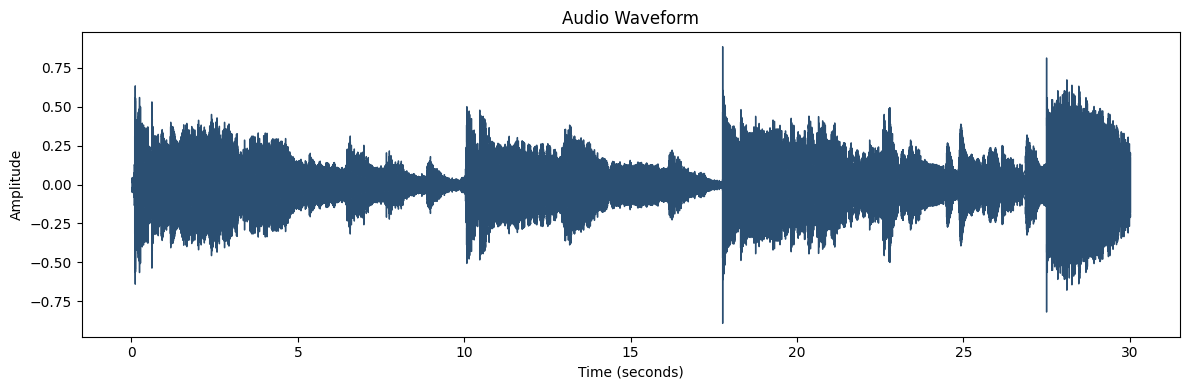

In [32]:
# With 'data' and 'sr' are already loaded from your audio file

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y=data, sr=sr, color="#2B4F72")
plt.title('Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

### **Understanding Spectrograms in Audio Analysis**

A spectrogram is a visual representation of the frequency spectrum of an audio signal as it varies over time. It captures how the energy of different frequencies changes dynamically, thereby providing both temporal and spectral information about a sound. This makes it one of the most fundamental tools in audio signal processing and music information retrieval (MIR).

Essentially, a spectrogram converts a one-dimensional time-domain signal (the waveform) into a two-dimensional representation where the x-axis represents time, the y-axis represents frequency, and the color intensity (or brightness) represents the amplitude or energy of each frequency component at a given point in time.

Mathematically, the spectrogram is derived using the Short-Time Fourier Transform (STFT). The STFT divides an audio signal into overlapping short frames and applies the Fourier Transform to each frame. This process converts the signal from the time domain into the frequency domain in small time intervals, allowing observation of how frequency content evolves as the signal progresses.

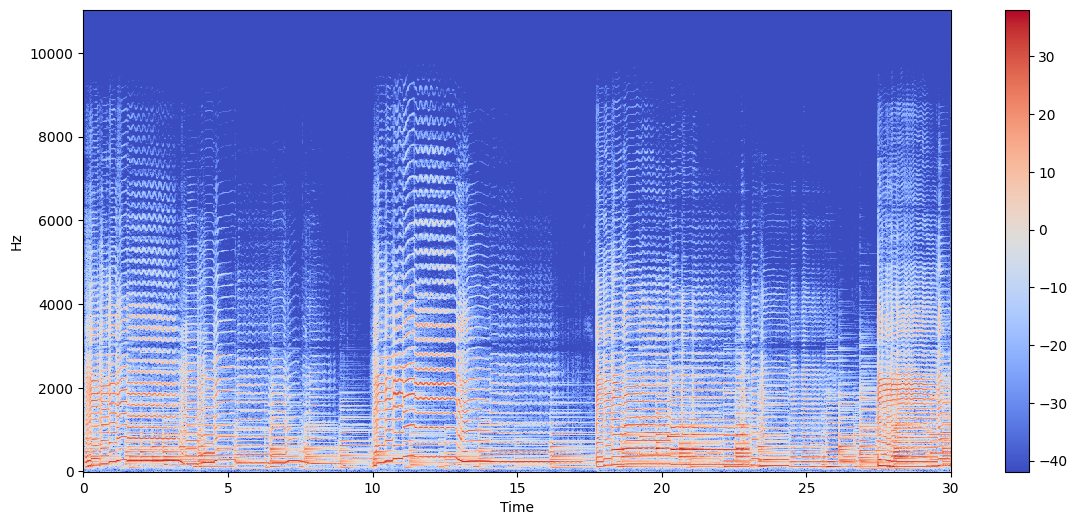

In [33]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

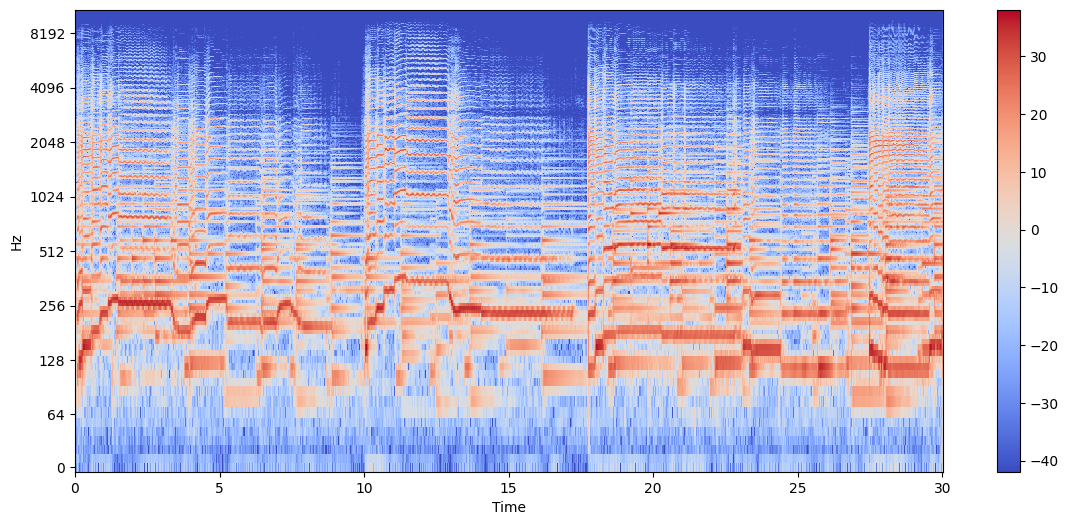

In [34]:
plt.figure(figsize=(14, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

### **Spectral Rolloff**

is the frequency below which a specified percentage of the total spectral energy

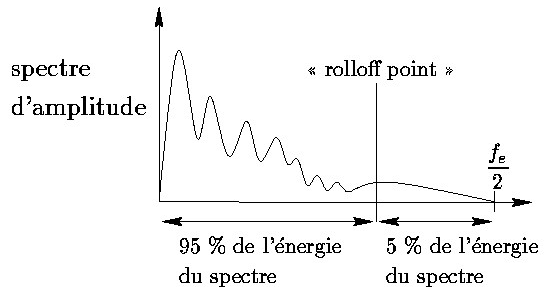

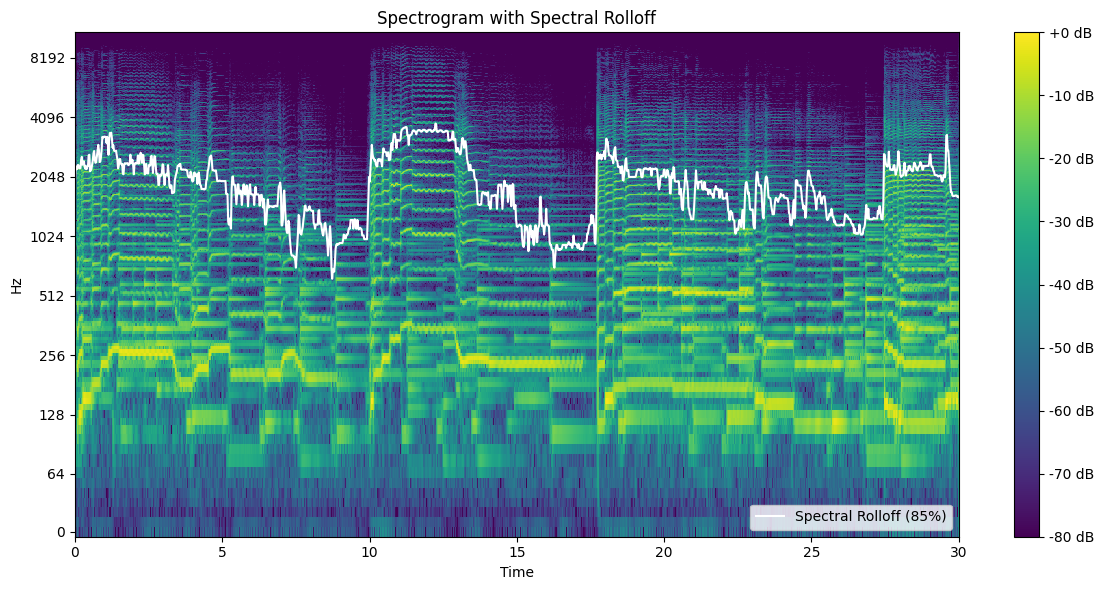

In [35]:
# 1. Calculate the magnitude spectrogram (STFT)
S, phase = librosa.magphase(librosa.stft(data))

# 2. Calculate the spectral rolloff from the spectrogram
#    It's more efficient to pass the spectrogram S directly
spectral_rolloff = librosa.feature.spectral_rolloff(S=S, sr=sr)[0]

# 3. Create the plot
plt.figure(figsize=(12, 6))

# Display the spectrogram
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         sr=sr,
                         x_axis='time',
                         y_axis='log',
                         cmap='viridis')

# 4. Overlay the rolloff line
#    We need the time mapping for each frame
times = librosa.frames_to_time(np.arange(len(spectral_rolloff)), sr=sr)
plt.plot(times, spectral_rolloff, color='w', label='Spectral Rolloff (85%)')

plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram with Spectral Rolloff')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### **Zero-Crossing Rate**

a zero crossing is said to occur if successive samples have different algebraic signs. The rate at which zero crossings occur is a simple measure of the frequency content of a signal. Zero-crossing rate is a measure of number of times in a given time interval/frame that the amplitude of the speech signals passes through a value of zero.

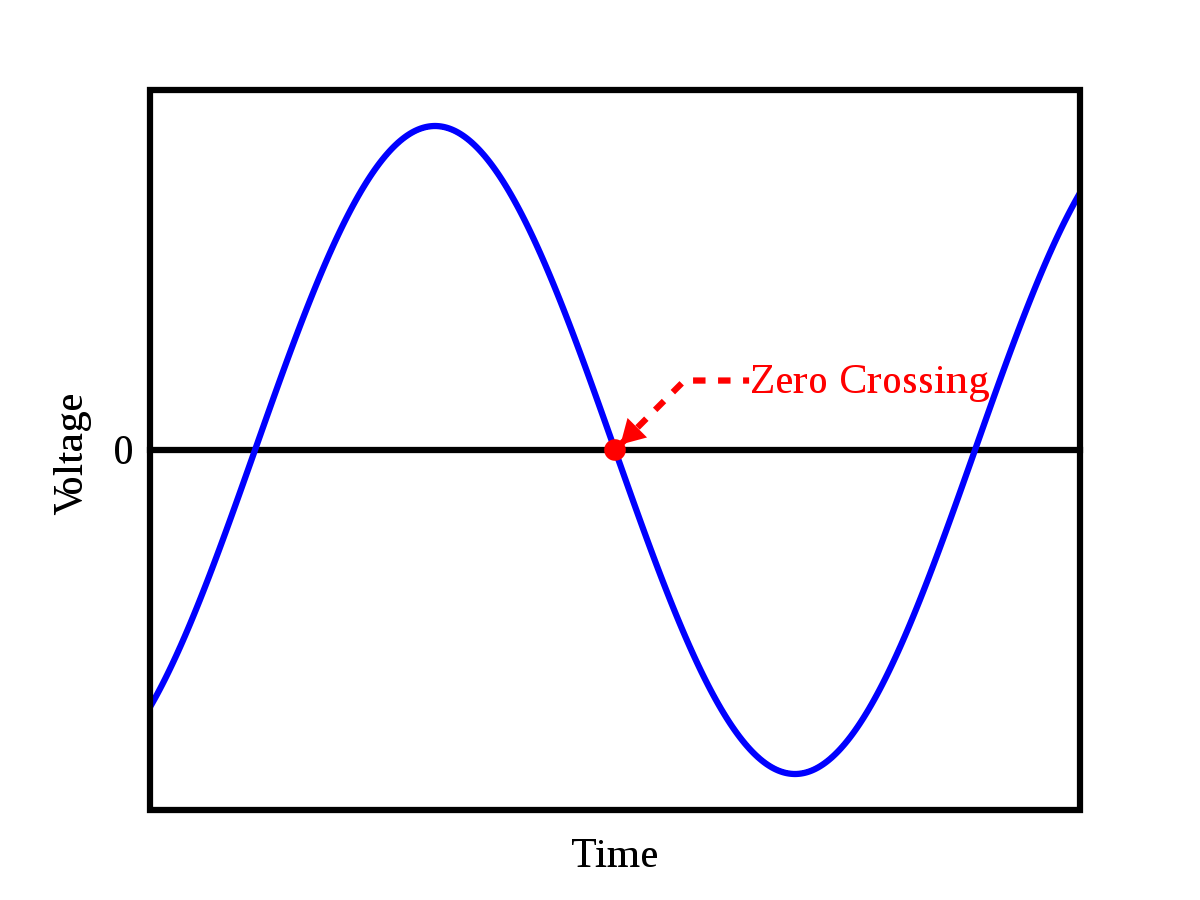

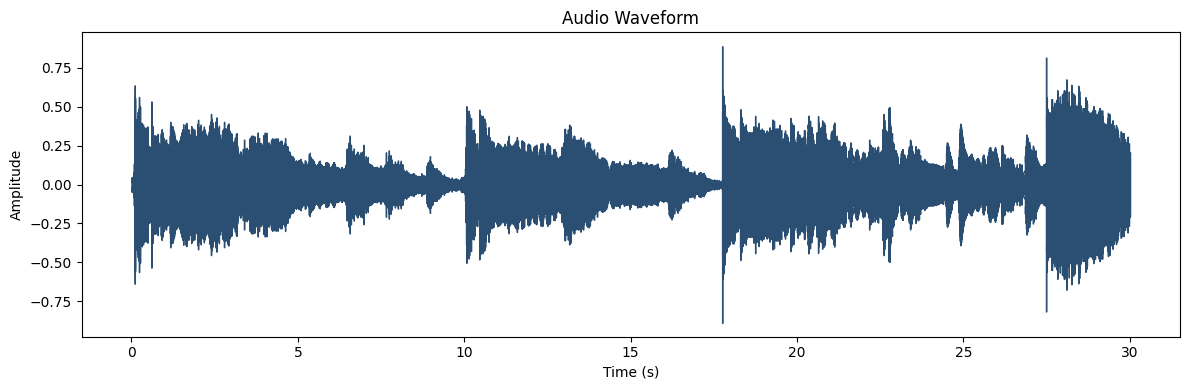

In [36]:
plt.figure(figsize=(12, 4))

# Use waveshow instead of waveplot
librosa.display.waveshow(y=data, sr=sr, color="#2B4F72")

plt.title("Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

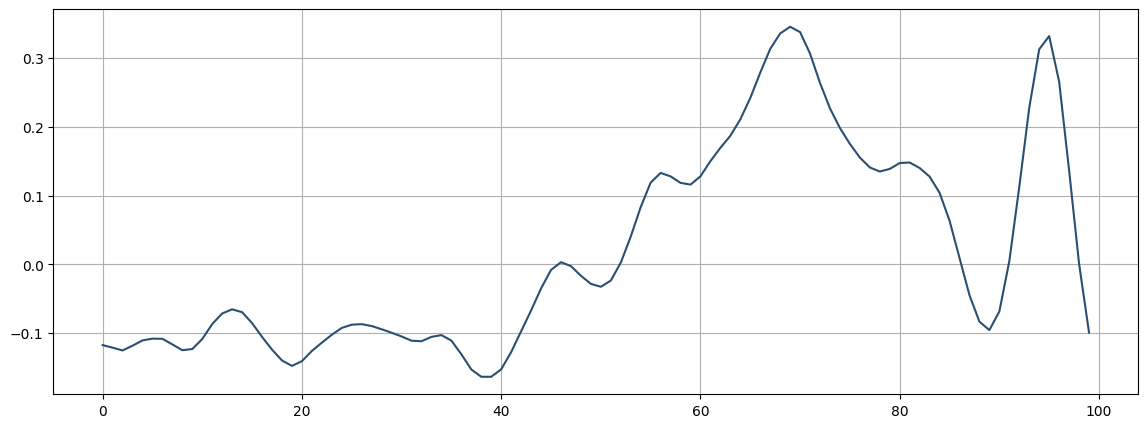

In [37]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(data[n0:n1], color="#2B4F72")
plt.grid()

In [38]:
zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
print("The number of zero-crossings is :",sum(zero_crossings))

The number of zero-crossings is : 6


**Chroma feature** (also known as chromagram) is a compressed encoding of music which encodes the entire spectrum of audio into 12 bins each representing one of the 12 notes of the Western musical scale (C, C-sharp, D, D-sharp, E, F, F-sharp, G, G-sharp, A, A-sharp, B).

This representation effectively captures the harmonic and melodic structure of a song by showing how the energy of each pitch class changes over time. One of its greatest advantages is timbre invariance, meaning that the chroma feature remains consistent regardless of the instrument or sound texture used. For instance, a C-major chord played on a piano, guitar, or by an orchestra will yield a similar chroma pattern.

In the context of music genre classification (e.g., GTZAN or African Music Genre Classifier projects), chroma features enable models to identify genres based on harmonic patterns and chord progressions, rather than instrument-specific timbres. This makes them especially powerful for distinguishing genres that share similar rhythmic patterns but differ in harmonic structure.

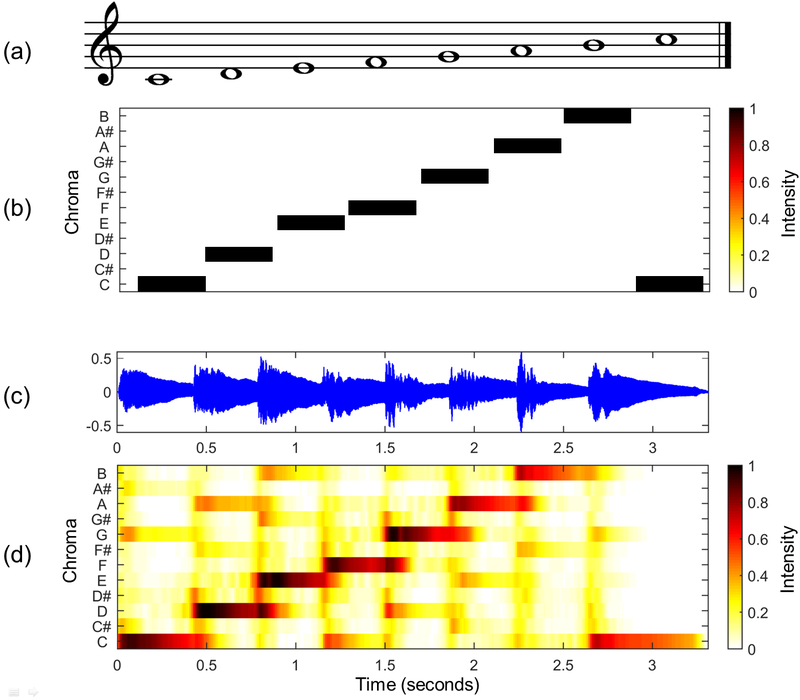

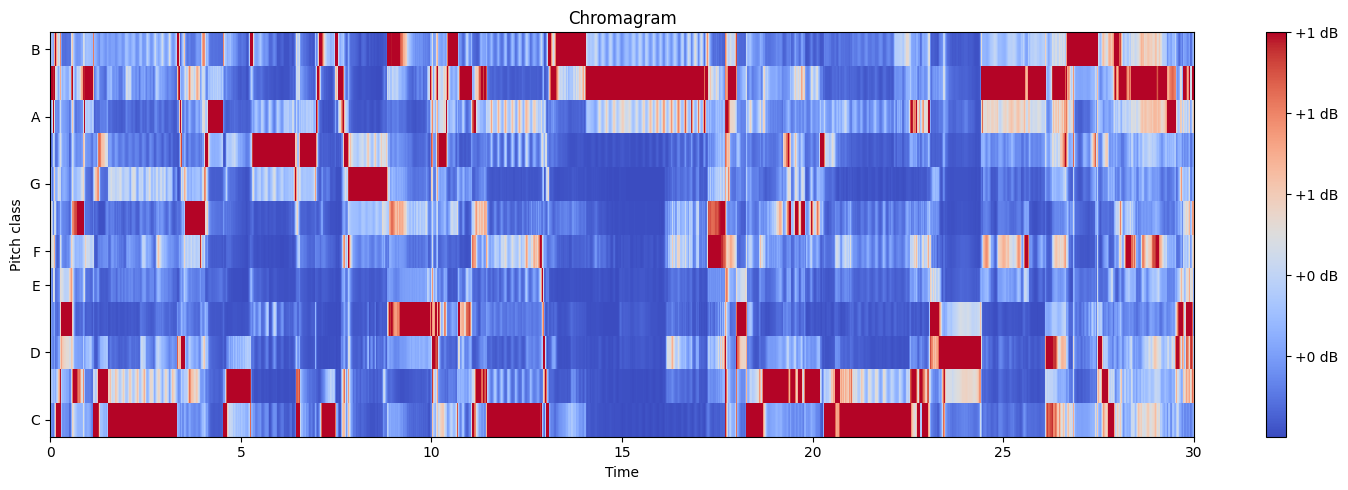

In [39]:
# Use y=data for the keyword argument
chromagram = librosa.feature.chroma_stft(y=data, sr=sr)

plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram,
                         x_axis='time',
                         y_axis='chroma',
                         cmap='coolwarm',
                         sr=sr)  # Add sr to specshow for correct time axis

plt.title('Chromagram')
plt.colorbar(format='%+2.0f dB') # Add a colorbar to show intensity
plt.tight_layout()
plt.show()

## **Training The Model**

**Classification**

Our Datasets contains 10 genres :

*   Blues
*   Classical
*   Country
*   Disco
*   Hip Hop
*   Jazz
*   Metal
*   Pop
*   Reggae
*   Rock












In [40]:
%matplotlib inline
from keras import layers
import keras

### **Exploratory Data Analysis On Features 3 secs Dataset**

In [41]:
df1 = pd.read_csv('/content/drive/MyDrive/GTZAN Dataset/Data/features_3_sec.csv')
df1.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [42]:
df1.shape

(9990, 60)

In [43]:
df1.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var                  float64
mfcc6_mean                 float64
mfcc6_var                  float64
mfcc7_mean                 float64
mfcc7_var                  float64
mfcc8_mean                 float64
mfcc8_var                  float64
mfcc9_mean                 float64
mfcc9_var                  float64
mfcc10_mean                float64
mfcc10_var                 float64
mfcc11_mean                float64
mfcc11_var                 float64
mfcc12_mean                float64
mfcc12_var                 float64
mfcc13_mean                float64
mfcc13_var                 float64
mfcc14_mean                float64
mfcc14_var                 float64
mfcc15_mean                float64
mfcc15_var                 float64
mfcc16_mean                float64
mfcc16_var                 float64
mfcc17_mean                float64
mfcc17_var                 float64
mfcc18_mean                float64
mfcc18_var                 float64
mfcc19_mean                float64
mfcc19_var                 float64
mfcc20_mean                float64
mfcc20_var                 float64
label                       object
dtype: object

In [44]:
# Understanding the Data.

def column_summary(df1):
    # Return a new DataFrame with summarized information about the columns of 'df'.
    return pd.DataFrame({
        'Data Type': df1.dtypes,  # Retrieve the data type of each column (e.g., int64, object).
        'Missing Values': df1.isnull().sum(),  # Count the number of missing
        'Unique Values': df1.nunique(),  # Count the number of unique values in each column.
        'Memory Usage (bytes)': df1.memory_usage(index=False)  # Calculate memory usage for each column (excluding the index).
    })

# print the resulting DataFrame.""
print(column_summary(df1))

                        Data Type  Missing Values  Unique Values  \
filename                   object               0           9990   
length                      int64               0              1   
chroma_stft_mean          float64               0           9845   
chroma_stft_var           float64               0           9831   
rms_mean                  float64               0           9846   
rms_var                   float64               0           9846   
spectral_centroid_mean    float64               0           9847   
spectral_centroid_var     float64               0           9847   
spectral_bandwidth_mean   float64               0           9847   
spectral_bandwidth_var    float64               0           9847   
rolloff_mean              float64               0           9181   
rolloff_var               float64               0           9847   
zero_crossing_rate_mean   float64               0           8783   
zero_crossing_rate_var    float64               

In [45]:
genre_list = df1.iloc[:, -1]
encoder = LabelEncoder()

In [46]:
y = encoder.fit_transform(genre_list)

In [47]:
print(y)

[0 0 0 ... 9 9 9]


In [48]:
print(df1.iloc[:, :-1])


               filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean 

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 1. Create your scaled features (X)
#    (This will have 9990 rows, based on your error)
X_scaled = scaler.fit_transform(np.array(df1.iloc[:, 1:-1], dtype = float))

# 2. Create your labels (y) from the *last* column
y_labels = np.array(df1.iloc[:, -1])

# 3. (Recommended) Convert string labels ('blues', 'rock') to numbers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_labels)

# 4. Now, split the correct variables: X_scaled and y_encoded
#    Use X_scaled, not the old 'X'
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.33, random_state=42)

# print(X_train.shape)
# print(y_train.shape)

In [59]:
from keras.models import Sequential

In [60]:
# Neural network
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.3872 - loss: 1.7730
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6745 - loss: 0.9587
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7505 - loss: 0.7347
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8015 - loss: 0.5968
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8405 - loss: 0.4814
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8586 - loss: 0.4242
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8777 - loss: 0.3740
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9067 - loss: 0.3078
Epoch 9/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9143 - loss: 0.2732
Epoch 10/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9339 - loss: 0.2179
Epoch 11/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9458 - loss: 0.1997
Epoch 12/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [62]:
test_loss, test_acc  = model.evaluate(X_test, y_test, batch_size=128)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8952 - loss: 0.5968


In [63]:
print("The test loss is :",test_loss, "\nThe test accuracy is :",test_acc)

The test loss is : 0.5563529133796692 
The test accuracy is : 0.900212287902832
